In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn.metrics

# Compare to JGolbeck et al. on Fake News dataset


In [3]:
golbeck_df = pd.read_csv("../data/jgolbeck.csv")
golbeck_df.shape

(96, 1)

# Compare to Guess, Nyhan, and Reifler

In [4]:
nyhan_df = pd.read_csv("../data/guess_nyhan_reifler.csv")
nyhan_df.shape

(92, 2)

# Starbird Alternative Media

In [5]:
starbird_df = pd.read_excel("../data/starbird_AlternativeDomains.xlsx")
starbird_df["domain"] = starbird_df["Domain"]

starbird_alt = starbird_df[starbird_df["Media Type (Determined through Content Analysis)"] == "Alternative Media"]
starbird_alt.shape

(79, 6)

# Merged Fake News List

In [6]:
sets = dict([
    ("golbeck", set(golbeck_df["domain"])),
    ("starbird_alt", set(starbird_alt["domain"])),
    ("nyhan", set(nyhan_df["domain"])),
])

# Dataset used for summer 2018
sets["merged"] = sets["nyhan"].union(sets["golbeck"]).union(sets["starbird_alt"])

In [7]:
for t, s in sets.items():
    print(t, len(s))

golbeck 96
starbird_alt 79
nyhan 92
merged 246


golbeck golbeck
	Overlap: 1.0 96 96
golbeck starbird_alt
	Overlap: 0.09375 9 96
golbeck nyhan
	Overlap: 0.09375 9 96
golbeck merged
	Overlap: 1.0 96 96
starbird_alt golbeck
	Overlap: 0.11392405063291139 9 79
starbird_alt starbird_alt
	Overlap: 1.0 79 79
starbird_alt nyhan
	Overlap: 0.0379746835443038 3 79
starbird_alt merged
	Overlap: 1.0 79 79
nyhan golbeck
	Overlap: 0.09782608695652174 9 92
nyhan starbird_alt
	Overlap: 0.03260869565217391 3 92
nyhan nyhan
	Overlap: 1.0 92 92
nyhan merged
	Overlap: 1.0 92 92
merged golbeck
	Overlap: 0.3902439024390244 96 246
merged starbird_alt
	Overlap: 0.32113821138211385 79 246
merged nyhan
	Overlap: 0.37398373983739835 92 246
merged merged
	Overlap: 1.0 246 246


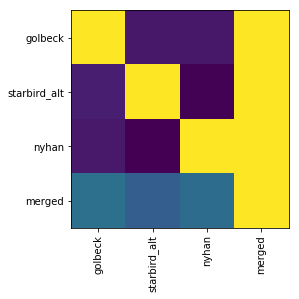

In [8]:
n = len(sets)
sim = np.zeros((n, n))

sets_list = list(sets.items())

for i in range(n):
    left, l = sets_list[i]
    for j in range(n):
        right, r = sets_list[j]
        print(left, right)
        o = len(l.intersection(r)) / len(l)
        print("\tOverlap:", o, len(l.intersection(r)), len(l))
        
        sim[i, j] = o
        
        
fig, ax = plt.subplots()
ax.imshow(sim)

ax.set_xticks(range(n))
ax.set_xticklabels([x[0] for x in sets_list], rotation=90)

ax.set_yticks(range(n))
ax.set_yticklabels([x[0] for x in sets_list])

plt.show()

In [9]:
sim

array([[1.        , 0.09375   , 0.09375   , 1.        ],
       [0.11392405, 1.        , 0.03797468, 1.        ],
       [0.09782609, 0.0326087 , 1.        , 1.        ],
       [0.3902439 , 0.32113821, 0.37398374, 1.        ]])

In [10]:
with open("summer2018_merged_tld_set.csv", "w") as out_file:
    for tld in sets["merged"]:
        out_file.write("%s\n" % tld)